![пример нейронной сети](https://disk.yandex.ru/i/Alu7DvsEfbQcRQ\))

https://disk.yandex.ru/i/Alu7DvsEfbQcRQ

X,Y,r,s,z,v,w,A,B,C

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

sns.set_theme()
# a = -((x * 3 - y - 2) + (-x + 3 * y - 6) - 2) + 2 * ((-5 * x - 7 * y + 35) + (2 * x - y + 4) + (-2 * x + 7 * y - 4) - 3) - 2

In [ ]:
def calc(x: float, y: float) -> bool:
    r = int((x * 3 - y - 2) >= 0)
    s = int((-x + 3 * y - 6) >= 0)
    z = int((-5 * x - 7 * y + 35) >= 0)
    v = int((2 * x - y - 4) >= 0)
    w = int((-2 * x + 7 * y - 4) >= 0)
    B = int((r + s - 2) >= 0)
    A = int((z + v + w - 3) >= 0)
    C = int((-B + 2 * A - 2) >= 0)
    return C

In [ ]:
%%time
res = []
for x in tqdm(np.arange(-10, 10, 0.1)):
    for y in np.arange(-10, 10, 0.1):
        res.append({"x": x, "y": y, "calc": calc(x, y)})
        # res.append({"x": x, "y": y, "calc": round(x+y)%2})

100%|██████████| 200/200 [00:00<00:00, 1046.76it/s]

CPU times: user 195 ms, sys: 1.51 ms, total: 196 ms
Wall time: 195 ms


In [ ]:
df = pd.DataFrame(res)
df.head()

,x,y,calc
0,-10.0,-10.0,0
1,-10.0,-9.9,0
2,-10.0,-9.8,0
3,-10.0,-9.7,0
4,-10.0,-9.6,0


In [ ]:
df.calc.unique()

array([0, 1])

C = -((x * 3 - y - 2) + (-x + 3 * y - 6) - 2) + 2 * ((-5 * x - 7 * y + 35) + (2 * x - y - 4) + (-2 * x + 7 * y - 4) - 3) - 2

Математическая модель сети:
r = q1: (3x - y - 2 >= 0)
s = q2: (-x + 3y - 6 >= 0)
z = q3: (-5x - 7y + 35 >= 0)
v = q4: (2x - y - 4 >= 0)
w = q5: (-2x + 7y - 4 >= 0)
B = q6: (r + s - 2 >= 0)
A = q7: (z + v + w - 3 >= 0)
C = q8: (-B + 2A - 2 >= 0)


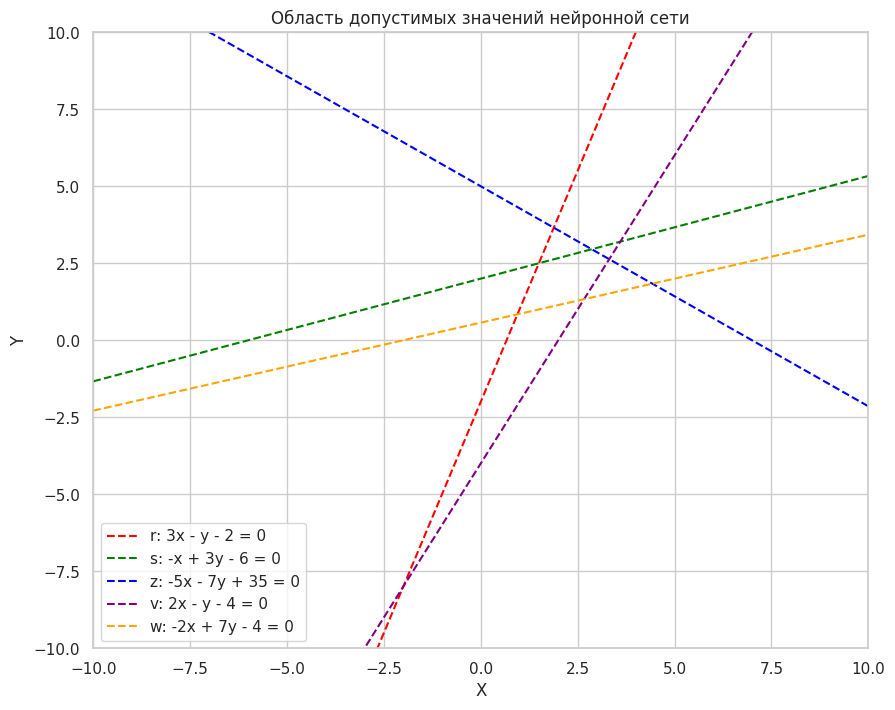

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def calc(x: float, y: float) -> bool:
    # Функции r, s, z, v, w
    r = (x * 3 - y - 2) >= 0
    s = (-x + 3 * y - 6) >= 0
    z = (-5 * x - 7 * y + 35) >= 0
    v = (2 * x - y - 4) >= 0
    w = (-2 * x + 7 * y - 4) >= 0

    # Функции A и B
    B = (r + s - 2) >= 0
    A = (z + v + w - 3) >= 0

    # Выходная функция C
    C = (np.logical_not(B) + 2 * A - 2) >= 0

    return C

# Создание сетки точек
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)

# Вычисление значений C для каждой точки
Z = np.zeros_like(X, dtype=bool)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = calc(X[i, j], Y[i, j])

# Визуализация
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
# Заливка области, где C = 1
plt.contourf(X, Y, Z, levels=[0.5, 1.5], colors=['white', 'lightblue'], alpha=0.5)

# Линии разделения для r, s, z, v, w
plt.plot(x, 3*x - 2, label='r: 3x - y - 2 = 0', color='red', linestyle='--')
plt.plot(x, (x + 6)/3, label='s: -x + 3y - 6 = 0', color='green', linestyle='--')
plt.plot(x, (-5*x + 35)/7, label='z: -5x - 7y + 35 = 0', color='blue', linestyle='--')
plt.plot(x, 2*x - 4, label='v: 2x - y - 4 = 0', color='purple', linestyle='--')
plt.plot(x, (2*x + 4)/7, label='w: -2x + 7y - 4 = 0', color='orange', linestyle='--')

plt.title('Область допустимых значений нейронной сети')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.legend()

# Математическая модель сети
print("Математическая модель сети:")
print("r = q1: (3x - y - 2 >= 0)")
print("s = q2: (-x + 3y - 6 >= 0)")
print("z = q3: (-5x - 7y + 35 >= 0)")
print("v = q4: (2x - y - 4 >= 0)")
print("w = q5: (-2x + 7y - 4 >= 0)")
print("B = q6: (r + s - 2 >= 0)")
print("A = q7: (z + v + w - 3 >= 0)")
print("C = q8: (-B + 2A - 2 >= 0)")

plt.show()

In [ ]:
df

,x,y,calc
0,-10.0,-10.0,0
1,-10.0,-9.9,0
2,-10.0,-9.8,0
3,-10.0,-9.7,0
4,-10.0,-9.6,0
...,...,...,...
39995,9.9,9.5,0
39996,9.9,9.6,0
39997,9.9,9.7,0
39998,9.9,9.8,0


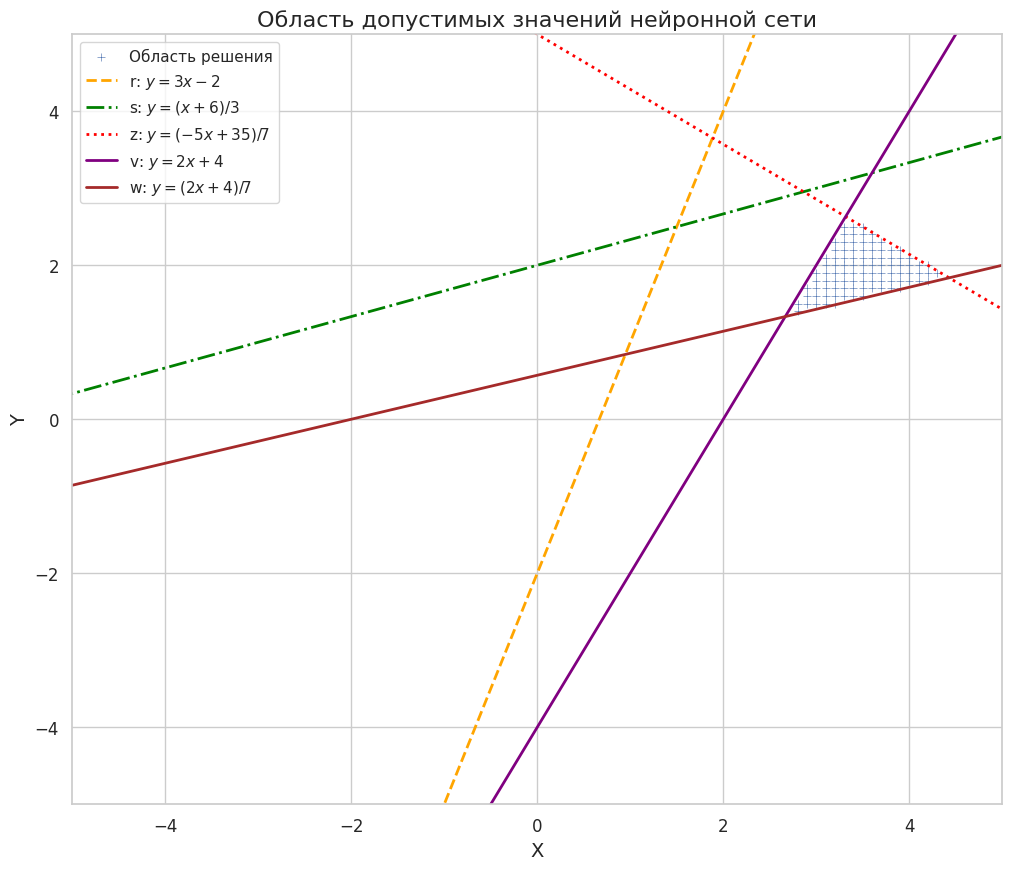

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def calc(x: float, y: float) -> bool:
    r = int((x * 3 - y - 2) >= 0)
    s = int((-x + 3 * y - 6) >= 0)
    z = int((-5 * x - 7 * y + 35) >= 0)
    v = int((2 * x - y - 4) >= 0)#исправлено с +4 на -4
    w = int((-2 * x + 7 * y - 4) >= 0)
    B = int((r + s - 2) >= 0)
    A = int((z + v + w - 3) >= 0)
    C = int((-B + 2 * A - 2) >= 0)
    return C

# Подготовка данных
res = []
for x in np.arange(-10, 10, 0.1):
    for y in np.arange(-10, 10, 0.1):
        res.append({"x": x, "y": y, "calc": calc(x, y)})

df = pd.DataFrame(res)

# Визуализация
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")  # Установка стиля сетки

# Scatter plot с использованием seaborn
sns.scatterplot(data=df[df["calc"] == 1], x="x", y="y", marker="+", s=30, label='Область решения')  # Изменен цвет на красный

max_ = 5
plt.xlim((-max_, max_))
plt.ylim((-max_, max_))

# Линии разделения с улучшенным оформлением
x = np.linspace(-10, 10, 400)  # Более плотная сетка для линий
plt.plot(x, 3 * x - 2, label="r: $y=3x-2$", color='orange', linestyle='--', linewidth=2)
plt.plot(x, (x + 6) / 3, label="s: $y=(x+6)/3$", color='green', linestyle='-.', linewidth=2)
plt.plot(x, (-5 * x + 35) / 7, label="z: $y=(-5x+35)/7$", color='red', linestyle=':', linewidth=2)
plt.plot(x, 2 * x - 4, label="v: $y=2x-4$", color='purple', linestyle='-', linewidth=2)
plt.plot(x, (2 * x + 4) / 7, label="w: $y=(2x+4)/7$", color='brown', linestyle='-', linewidth=2)

plt.legend()
plt.title('Область допустимых значений нейронной сети', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.grid(True)

# Установка размера шрифта для меток
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
